In [4]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as BS

df = pd.read_csv('./list_co.csv')
df['종목코드'] = df['종목코드'].map(lambda x: str(x).zfill(6))
df = df.sort_values(by='종목코드')
print(df)



             회사명    종목코드                      업종  \
2482        동화약품  000020                 의약품 제조업   
2474       KR모터스  000040          그외 기타 운송장비 제조업   
2572          경방  000050                  종합 소매업   
2571       메리츠화재  000060                     보험업   
2563       삼양홀딩스  000070                  기타 금융업   
...          ...     ...                     ...   
595          JTC  950170                  종합 소매업   
337          미투젠  950190          소프트웨어 개발 및 공급업   
359          소마젠  950200  그외 기타 전문, 과학 및 기술 서비스업   
269   프레스티지바이오파마  950210         자연과학 및 공학 연구개발업   
255        네오이뮨텍  950220         자연과학 및 공학 연구개발업   

                                           주요제품         상장일  결산월  \
2482                              의약품 제조,판매,수출입  1976-03-24  12월   
2474                            이륜차(오토바이) 제조,도매  1976-05-25  12월   
2572  섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입  1956-03-03  12월   
2571                           손해보험(화재,해상,운송보험)  1956-07-02  12월   
2563                               

In [32]:
from bs4 import BeautifulSoup
import requests

url = 'https://finance.naver.com/item/sise.naver?code=247540'
headers = {'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
html = requests.get(url, headers=headers).text
bs = BeautifulSoup(html, 'html.parser')
pagination = bs.find('td', class_='pgRR')

if pagination:
    last_page_url = pagination.find_all('a')[0]['href']
    print(last_page_url)
else:
    print('Pagination not found.')




Pagination not found.


In [38]:
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

url = 'https://finance.naver.com/item/sise_day.nhn?code=247540'
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 이전 페이지 링크 태그 찾기
pagination = soup.find('td', class_='pgRR').find('a')

# 마지막 페이지 URL
last_page_url = pagination['href']
print(last_page_url)


/item/sise_day.nhn?code=247540&page=98


In [40]:
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

url = 'https://finance.naver.com/item/sise_day.nhn?code=247540'
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 이전 페이지 링크 태그 찾기
pagination = soup.find('td', class_='pgRR').find('a')

# 마지막 페이지 URL
last_page_url = pagination['href']

s = str(last_page_url).split('=')
last_page = s[-1]

print(s)
print(last_page)

['/item/sise_day.nhn?code', '247540&page', '98']
98


In [44]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

url = 'https://finance.naver.com/item/sise_day.nhn?code=247540'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

dates = []
closing_prices = []
price_changes = []
opening_prices = []
high_prices = []
low_prices = []
volumes = []

for tr in soup.find_all('tr'):
    tds = tr.find_all('td')
    if len(tds) == 7:
        dates.append(tds[0].text)
        closing_prices.append(tds[1].text)
        price_changes.append(tds[2].text)
        opening_prices.append(tds[3].text)
        high_prices.append(tds[4].text)
        low_prices.append(tds[5].text)
        volumes.append(tds[6].text)

df = pd.DataFrame({
    'Date': dates,
    'Closing Price': closing_prices,
    'Price Change': price_changes,
    'Opening Price': opening_prices,
    'High Price': high_prices,
    'Low Price': low_prices,
    'Volume': volumes
})

print(df)


         Date Closing Price                   Price Change Opening Price  \
0  2023.02.13       139,000  \n\n\t\t\t\t6,300\n\t\t\t\t\n       132,600   
1  2023.02.10       132,700  \n\n\t\t\t\t2,000\n\t\t\t\t\n       135,400   
2  2023.02.09       130,700  \n\n\t\t\t\t8,700\n\t\t\t\t\n       121,600   
3  2023.02.08       122,000    \n\n\t\t\t\t200\n\t\t\t\t\n       123,600   
4  2023.02.07       121,800  \n\n\t\t\t\t3,100\n\t\t\t\t\n       119,500   
5  2023.02.06       118,700  \n\n\t\t\t\t4,600\n\t\t\t\t\n       113,600   
6  2023.02.03       114,100    \n\n\t\t\t\t100\n\t\t\t\t\n       113,600   
7  2023.02.02       114,000  \n\n\t\t\t\t4,800\n\t\t\t\t\n       110,400   
8  2023.02.01       109,200  \n\n\t\t\t\t9,400\n\t\t\t\t\n       101,000   
9  2023.01.31        99,800  \n\n\t\t\t\t3,600\n\t\t\t\t\n       100,500   

  High Price Low Price     Volume  
0    142,500   130,400  3,432,224  
1    139,700   128,700  2,873,415  
2    131,400   120,700  3,910,409  
3    124,600   119,

In [46]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=247540'

for page in range(1, int(last_page)+1):
    url = '{}&page{}'.format(sise_url, page)
    html = requests.get(url, headers=headers).text
    df = df.append(pd.read_html(html, header=0)[0])

df = df.dropna
print(df)

/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/674678033.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/674678033.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/674678033.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/674678033.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

<bound method DataFrame.dropna of             날짜        종가     전일비        시가        고가        저가        거래량
0          NaN       NaN     NaN       NaN       NaN       NaN        NaN
1   2023.02.13  139000.0  6300.0  132600.0  142500.0  130400.0  3432224.0
2   2023.02.10  132700.0  2000.0  135400.0  139700.0  128700.0  2873415.0
3   2023.02.09  130700.0  8700.0  121600.0  131400.0  120700.0  3910409.0
4   2023.02.08  122000.0   200.0  123600.0  124600.0  119700.0  1571643.0
..         ...       ...     ...       ...       ...       ...        ...
10  2023.02.03  114100.0   100.0  113600.0  116200.0  112000.0  1513973.0
11  2023.02.02  114000.0  4800.0  110400.0  114400.0  110400.0  1879935.0
12  2023.02.01  109200.0  9400.0  101000.0  109600.0  100800.0  2337574.0
13  2023.01.31   99800.0  3600.0  100500.0  101300.0   99000.0  1324971.0
14         NaN       NaN     NaN       NaN       NaN       NaN        NaN

[1470 rows x 7 columns]>


/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/674678033.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])


/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/979554004.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/979554004.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/979554004.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
/var/folders/fs/s8rq8qv53ml80fb93182x1fh0000gp/T/ipykernel_3412/979554004.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

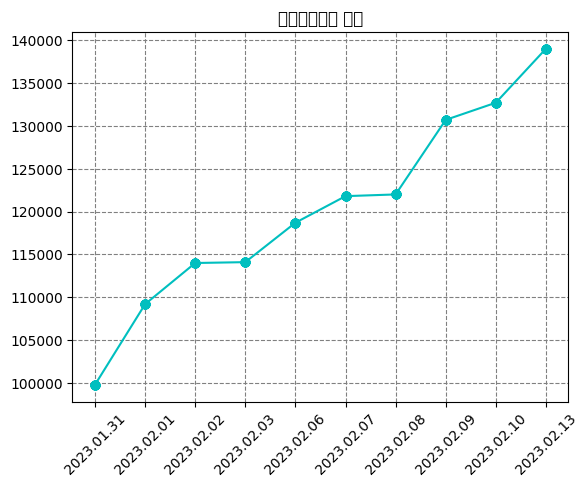

In [58]:
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}

url = 'https://finance.naver.com/item/sise_day.nhn?code=247540'
html = requests.get(url, headers=headers).text
soup = BeautifulSoup(html, 'html.parser')

# 이전 페이지 링크 태그 찾기
pagination = soup.find('td', class_='pgRR').find('a')

# 마지막 페이지 URL
last_page_url = pagination['href']

s = str(last_page_url).split('=')
last_page = s[-1]

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=247540'

for page in range(1, int(last_page)):
    url = '{}&page{}'.format(sise_url, page)
    html = requests.get(url, headers=headers).text
    df = df.append(pd.read_html(html, header=0)[0])

df = df.dropna()
df = df.iloc[0:300]
df = df.sort_values(by='날짜')

plt.title('에코프로비엠 차트')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()


In [63]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 네이버 파이낸스에서 에코프로의 일별시세 데이터 가져오기
url = "https://finance.naver.com/item/sise_day.nhn?code=068400&page=1"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# 테이블 태그 찾기
table = soup.find("table", attrs={"class":"type2"})

# 행(row) 태그 찾기
trs = table.find_all("tr")

# 데이터 프레임을 생성하기 위한 리스트
data = []
for tr in trs:
    tds = tr.find_all("td")
    if len(tds) == 7:
        date = tds[0].find("span").text.strip()
        close = tds[1].text.strip()
        change = tds[2].text.strip()
        open = tds[3].text.strip()
        high = tds[4].text.strip()
        low = tds[5].text.strip()
        volume = tds[6].text.strip()
        data.append([date, close, change, open, high, low, volume])

# 데이터 프레임으로 만들기
columns = ["date", "close", "change", "open", "high", "low", "volume"]
df = pd.DataFrame(data, columns=columns)

print(df)

AttributeError: 'NoneType' object has no attribute 'find_all'